In [38]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , confusion_matrix

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
X = df.iloc[:,3:13]
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [4]:
y = df.iloc[:,13]
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [5]:
geo = pd.get_dummies(X['Geography'],drop_first=True)
gen = pd.get_dummies(X['Gender'],drop_first=True)

In [6]:
X = pd.concat([X,geo,gen],axis=1)
X = X.drop(['Geography','Gender'],axis=1)

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
import keras
from keras.models import Sequential
from keras.layers import Dense , Input
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [24]:
classifier = Sequential()

# Defining input layer
classifier.add(Input(shape=(11,)))

# First layer
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))  #units = output

#Second layer 
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))

#Output layer
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

#Compling the ANN 
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#Fitting the ANN to the trainig set 
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 484us/step - accuracy: 0.4227 - loss: 0.9207 - val_accuracy: 0.7959 - val_loss: 0.5367
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - accuracy: 0.7960 - loss: 0.5071 - val_accuracy: 0.8020 - val_loss: 0.4657
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - accuracy: 0.8016 - loss: 0.4499 - val_accuracy: 0.8111 - val_loss: 0.4420
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - accuracy: 0.8104 - loss: 0.4314 - val_accuracy: 0.8126 - val_loss: 0.4338
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - accuracy: 0.8226 - loss: 0.4146 - val_accuracy: 0.8171 - val_loss: 0.4262
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - accuracy: 0.8261 - loss: 0.4049 - val_accuracy: 0.8220 - val_loss: 0.4210
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - accuracy: 0.8384 - loss: 0.3866 - val_accuracy: 0.8228 - val_loss: 0.4154
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.8279 - loss: 0

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step
Accuracy: 0.8620


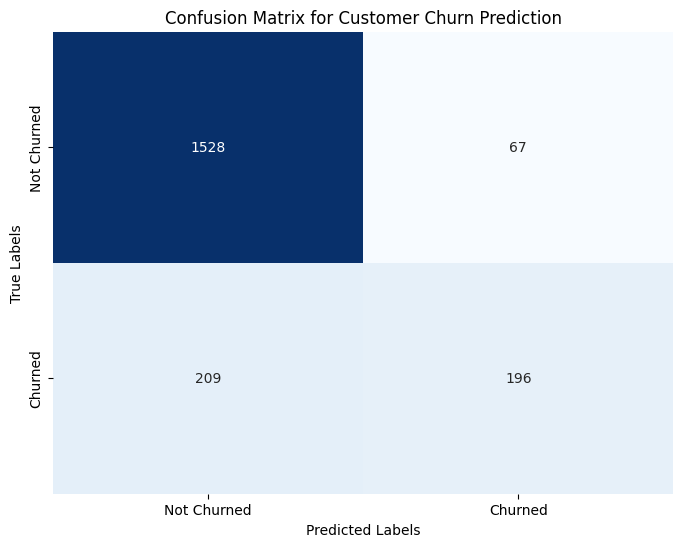

In [40]:
y_pred = classifier.predict(X_test)
y_pred = y_pred>0.5

cm = confusion_matrix(y_test,y_pred)
score = accuracy_score(y_test,y_pred)

print(f"Accuracy: {score:.4f}")

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, 
            xticklabels=['Not Churned', 'Churned'], 
            yticklabels=['Not Churned', 'Churned'])
plt.title('Confusion Matrix for Customer Churn Prediction')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

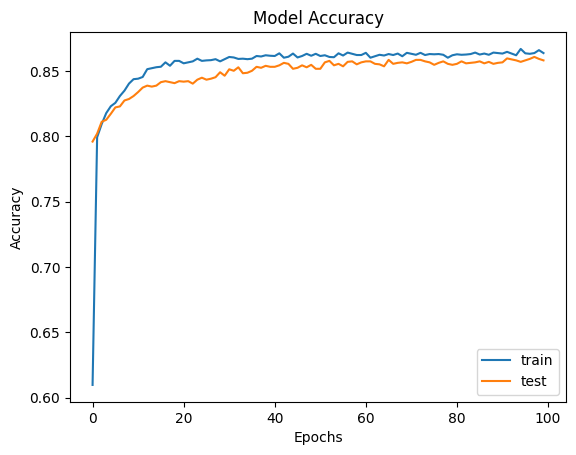

In [41]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history[ 'val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='lower right')
plt.show()